# Exploration of the WikiLarge dataset

In [1]:
import os
import pathlib
import nltk
import numpy as np
from unicodedata import normalize
import collections
%reload_ext autoreload
%autoreload 2
from model import *
from simplifier import *

nltk.download('words')
nltk.download('punkt')


[nltk_data] Downloading package words to /home/filipp/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/filipp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Importing data.

In [3]:
path_data = 'data-simplification/wikilarge/wiki.full.aner.'

In [4]:
train_src = open(path_data+'train.src', "r").readlines()
train_dst = open(path_data+'train.dst', "r").readlines()
train_ori_src = open(path_data+'ori.train.src', "r").readlines()
train_ori_dst = open(path_data+'ori.train.dst', "r").readlines()

valid_src = open(path_data+'valid.src', "r").readlines()
valid_dst = open(path_data+'valid.dst', "r").readlines()
valid_ori_src = open(path_data+'ori.valid.src', "r").readlines()
valid_ori_dst = open(path_data+'ori.valid.dst', "r").readlines()

test_src = open(path_data+'test.src', "r").readlines()
test_dst = open(path_data+'test.dst', "r").readlines()
test_ori_src = open(path_data+'ori.test.src', "r").readlines()
test_ori_dst = open(path_data+'ori.test.dst', "r").readlines()

### The train/valid/test_ori_src/dst files contatin the original sentences. The train/valid/test_src/dst contain the preprocessed sentences, where named entity recognition/detection was applied. (This obviously reduces the vocabularly size.( 

In [8]:
indx = 117
print(train_ori_src[indx:indx+1]) 
print(train_ori_dst[indx:indx+1]) 
print(train_src[indx:indx+1]) 
print(train_dst[indx:indx+1])


['They had four children : Sarah , Michael , Ruth and Maxim .\n']
['They have four children called Sarah , Michael , Ruth and Maxim .\n']
['They had four children : PERSON@1 , PERSON@2 , PERSON@3 and Maxim .\n']
['They have four children called PERSON@1 , PERSON@2 , PERSON@3 and Maxim .\n']


In [13]:
print(valid_ori_src[indx:indx+1])
print(valid_ori_dst[indx:indx+1])

['Mount Batur -LRB- Gunung Batur -RRB- is an active volcano located at the center of two concentric calderas north west of Mount Agung , Bali , Indonesia .\n']
['Mount Batur or Gunung Batur is a volcano on Bali .\n']


In [26]:
print('''
    Size of training set: {}
    Size of validation set: {} 
    Size of test set: {}
    '''.format(len(train_src), len(valid_src), len(test_src)))


    Size of training set: 296402
    Size of validation set: 992 
    Size of test set: 359
    


### We can also import the WikiSmall dataset.

In [27]:
path_data_small = 'data-simplification/wikismall/PWKP_108016.tag.80.aner.'

In [28]:
train_src_small = open(path_data_small+'train.src', "r").readlines()
train_dst_small = open(path_data_small+'train.dst', "r").readlines()
train_ori_src_small = open(path_data_small+'ori.train.src', "r").readlines()
train_ori_dst_small = open(path_data_small+'ori.train.dst', "r").readlines()

valid_src_small = open(path_data_small+'valid.src', "r").readlines()
valid_dst_small = open(path_data_small+'valid.dst', "r").readlines()
valid_ori_src_small = open(path_data_small+'ori.valid.src', "r").readlines()
valid_ori_dst_small = open(path_data_small+'ori.valid.dst', "r").readlines()

test_src_small = open(path_data_small+'test.src', "r").readlines()
test_dst_small = open(path_data_small+'test.dst', "r").readlines()
test_ori_src_small = open(path_data_small+'ori.test.src', "r").readlines()
test_ori_dst_small = open(path_data_small+'ori.test.dst', "r").readlines()

In [34]:
print('''
    Size of training set: {}
    Size of validation set: {} 
    Size of test set: {}
    '''.format(len(train_src_small), len(valid_src_small), len(test_src_small)))


    Size of training set: 88837
    Size of validation set: 205 
    Size of test set: 100
    


In [30]:
indx = 38180
print(train_ori_src_small[indx:indx+1],
train_ori_dst_small[indx:indx+1], sep='\n'
)

['Schwerin von Krosigk was tried at Nuremberg along with other leading members of the German government during the time of Nazi government .\n']
['Schwerin von Krosigk was tried at Ministries Trial at Nuremberg along with other leading members of the Nazi Government .\n']


### The sentence length will certainly influence the quality of translation/simplification, let's have a look at it.

In [35]:
lengths=[]
lengths = [len((tokenizer(x))) for x in train_ori_src]

In [36]:
print("min", np.min(lengths))
print("mean", np.mean(lengths))
print("max", np.max(lengths))
print("std", np.std(lengths))

min 0
mean 22.678625650299256
max 104
std 11.685398987054729


In [37]:
from pathlib import Path
path_exploration = 'data_exploration'

name = "src_sentence_lengths" #give it a name
Path(path_exploration).mkdir(parents=True, exist_ok=True)
plot_file_path = os.path.join(path_exploration, 'plot_{}.png'.format(name))


No handles with labels found to put in legend.


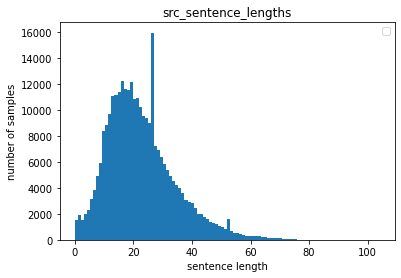

In [38]:
import matplotlib.pyplot as plt
plt.hist(lengths, bins=100)
plt.title(name)
plt.xlabel('sentence length')
plt.ylabel('number of samples')
plt.legend()
plt.savefig(plot_file_path.format(name), bbox_inches='tight')
plt.show()
plt.close()



In [39]:
lengths2=[]
lengths2 = [len((tokenizer(x))) for x in train_ori_dst]

In [40]:
print("min", np.min(lengths2))
print("mean", np.mean(lengths2))
print("max", np.max(lengths2))
print("std", np.std(lengths2))

min 0
mean 16.679013636885042
max 80
std 10.492046320896975


In [41]:
name = "dst_sentence_lengths" #give it a name
Path(path_exploration).mkdir(parents=True, exist_ok=True)
plot_file_path = os.path.join(path_exploration, 'plot_{}.png'.format(name))

No handles with labels found to put in legend.


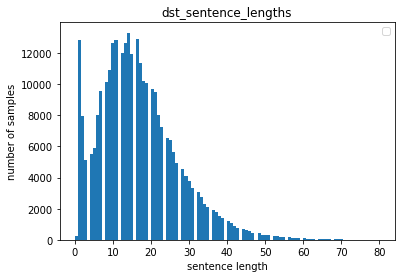

In [42]:
import matplotlib.pyplot as plt
plt.hist(lengths2, bins=100)
plt.title(name)
plt.xlabel('sentence length')
plt.ylabel('number of samples')
plt.legend()
plt.savefig(plot_file_path, bbox_inches='tight')
plt.show()
plt.close()

### We can also visualize the sentence length distribution in one plot.

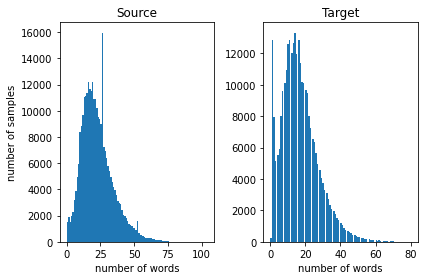

In [49]:
name = 'Sentence length distribution'
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.title(name)
ax1.hist(lengths, bins=100)
ax2.hist(lengths2, bins=100)
ax1.set_xlabel('number of words')
ax2.set_xlabel('number of words')
ax1.set_ylabel('number of samples')

ax1.set_title('Source')
ax2.set_title('Target')

fig.tight_layout()
plot_file_path = os.path.join(path_exploration, 'plot_{}.png'.format(name))
plt.savefig(plot_file_path, bbox_inches='tight')
plt.show()
plt.close()

### Let's have a look at the vocabulary size.

In [51]:
#uses the build_vocabulary function from simplifier.py
token_list_src_over_threshold = build_vocabulary(tokenize(clean(train_ori_src)), threshold=0) 
vocabulary_size_source = len(token_list_src_over_threshold) + 1 #adding 1 for the <UNK>-token
print('''
Total vocabulary in the training corpus: {} words/tokens
The 10 most common:
{}
    '''.format(vocabulary_size_source, token_list_src_over_threshold[:10]))



Total vocabulary in the training corpus: 360640 words/tokens
The 10 most common:
[('the', 415025), ('of', 240217), ('in', 187899), ('and', 181729), ('a', 160024), ('is', 120225), ('to', 104181), ('lrb', 87952), ('rrb', 71454), ('was', 62169)]
    


In [119]:
# import matplotlib.pyplot as plt
# plt.hist(token_list_src_over_threshold, bins=100)
# # plt.title(name)
# # plt.xlabel('sentence length')
# # plt.ylabel('number of samples')
# # plt.legend()
# # plt.savefig(plot_file_path, bbox_inches='tight')
# plt.show()
# plt.close()



#### The vocabulary size is far too big. What if we restrict ourselves to shorter sentences?  In the following we filter the training set sentence pairs of prescribed maximal (target) sentence length len_sent in a range and compute the vocabulary size. We plot the result afterwards.

In [52]:
voc_size = []
for len_sent in range(8, 41):
    train_ori_src_short, train_ori_dst_short= shorten(train_ori_src, train_ori_dst, len_sent, short_dst=True)
    token_list_src_short = build_vocabulary(tokenize(clean(train_ori_src_short)), threshold=0)
    token_list_dst_short = build_vocabulary(tokenize(clean(train_ori_dst_short)), threshold=0)
    
    vocabulary_size_source_short = len(token_list_src_short) 
    vocabulary_size_dst_short = len(token_list_dst_short) 
    voc_size.append((len_sent, vocabulary_size_source_short, vocabulary_size_dst_short))

In [53]:
name = "length-voc-distr" #give it a name
Path(path_exploration).mkdir(parents=True, exist_ok=True)
plot_file_path = os.path.join(path_exploration, 'plot_{}.png'.format(name))

In [54]:
import pickle
with open(os.path.join(path_exploration, 'list_8-40{}'.format(name)), 'wb') as file_pi:
        pickle.dump(voc_size, file_pi)

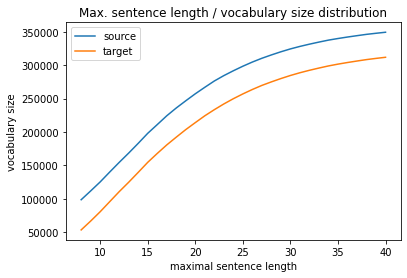

In [55]:
x = [e[0] for e in voc_size]
y = [e[1] for e in voc_size]
z = [e[2] for e in voc_size]
plt.plot(x, y, label = 'source')# z)#, bins=100)
plt.plot(x, z, label = 'target')
plt.title('Max. sentence length / vocabulary size distribution')
plt.xlabel('maximal sentence length')
plt.ylabel('vocabulary size')
plt.legend()
plt.savefig(plot_file_path, bbox_inches='tight')
plt.show()
plt.close()

#### Does the vocabulary size drops significantly if we replace the training set by the preprocessed training set (i.e. where named entities are replaced by placeholders)?

In [56]:
voc_size_ent = []
for len_sent in range(8, 41):
    train_src_short, train_dst_short= shorten(train_src, train_dst, len_sent, short_dst=True)
    token_list_src_ent_short = build_vocabulary(tokenize(clean(train_src_short)), threshold=0)
    token_list_dst_ent_short = build_vocabulary(tokenize(clean(train_dst_short)), threshold=0)
    
    vocabulary_size_source_ent_short = len(token_list_src_ent_short) 
    vocabulary_size_dst_ent_short = len(token_list_dst_ent_short) 
    voc_size_ent.append((len_sent, vocabulary_size_source_ent_short, vocabulary_size_dst_ent_short))

In [57]:
name = "length-voc-distr_with_entity_tagging" #give it a name
Path(path_exploration).mkdir(parents=True, exist_ok=True)
plot_file_path = os.path.join(path_exploration, 'plot_{}.png'.format(name))

In [58]:
with open(os.path.join(path_exploration, 'list_8-40{}'.format(name)), 'wb') as file_pi:
        pickle.dump(voc_size, file_pi)

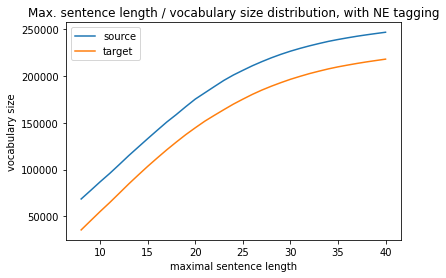

In [59]:
x = [e[0] for e in voc_size_ent]
y = [e[1] for e in voc_size_ent]
z = [e[2] for e in voc_size_ent]
plt.plot(x, y, label = 'source')# z)#, bins=100)
plt.plot(x, z, label = 'target')
plt.title('Max. sentence length / vocabulary size distribution, with NE tagging')
plt.xlabel('maximal sentence length')
plt.ylabel('vocabulary size')
plt.legend()
#plt.savefig(plot_file_path, bbox_inches='tight')
plt.show()
plt.close()

In [60]:
import gc
gc.collect()

41669

### visualizing an aws training session on the full dataset 
#### shallow encoder-decoder-model (see arch.), 6B 100d GloVe, encoder and decoder embeddings unfrozen, batchsize 128, 26 epochs

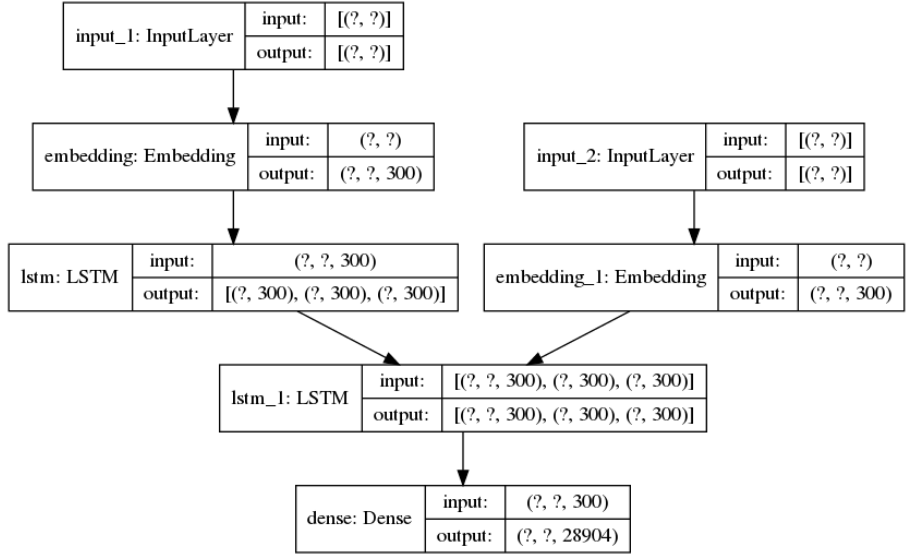

In [81]:
from IPython.display import Image
Image('aws_session2/models/model2.png')

In [70]:
path1 = os.path.join('aws_session2/models/trainHistory_model_ed_rms1_1Gemb_unfrEnDe_full_bs128_20ep')
path2 = os.path.join('aws_session2/models/trainHistory_model_ed_rms1_1Gemb_unfrEnDe_full_bs128_26ep')             
with open(path1, 'rb') as file:
     hist1 = pickle.load(file)
with open(path2, 'rb') as file:
     hist2 = pickle.load(file)            

In [72]:
hist3 = {}
for key in hist1.keys():
    hist3[key] = hist1[key]+hist2[key]

In [73]:
hist3.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

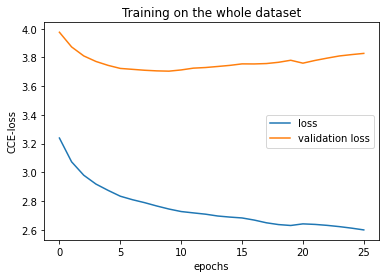

In [74]:
plt.plot(hist3["loss"], label="loss")
plt.plot(hist3["val_loss"], label="validation loss")
plt.title("Training on the whole dataset")
plt.xlabel('epochs')
plt.ylabel('CCE-loss')
plt.legend()
plt.savefig("data_exploration/training.png", bbox_inches='tight')
plt.show()
plt.close()